In [12]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [13]:
df.corr()['p-n ratio'].sort_values()

Simulation                        -0.069239
Strategy                          -0.063207
english                           -0.049284
Multi-player_cate                 -0.045736
Action                            -0.043137
Online Multi-Player_cate          -0.040548
Early Access                      -0.027672
achievements                      -0.017036
Casual                            -0.016437
Free to Play                      -0.011280
negative_ratings                  -0.003137
Adventure                         -0.001472
days_after_releasing               0.001684
RPG                                0.003218
windows                            0.004152
median_playtime                    0.006940
Partial Controller Support_cate    0.007453
required_age                       0.010279
average_playtime                   0.017666
Indie                              0.020276
Shared/Split Screen_cate           0.021183
owners                             0.036760
positive_ratings                

In [14]:
import statsmodels.api as sm

X=df[df.columns[:-1]]
y=df['p-n ratio']

model=sm.OLS(y, X)
result=model.fit()

print('회귀계수\n',result.params)
print()
print('R-squared :',result.rsquared)
print()
print('P values\n',result.pvalues)

회귀계수
 days_after_releasing              -2.718076e-04
english                           -4.078862e+00
required_age                      -2.413577e-02
achievements                      -3.595396e-04
average_playtime                   1.605200e-04
median_playtime                   -1.014428e-04
owners                             2.803493e-07
price                              5.256554e-02
positive_ratings                   2.609361e-05
negative_ratings                  -1.683254e-04
linux                              7.246346e-01
mac                                8.764110e-01
windows                            8.180179e+00
Single-player_cate                 1.188270e+00
Steam Achievements_cate            7.265210e-01
Steam Trading Cards_cate          -8.842093e-02
Steam Cloud_cate                   2.042590e+00
Full controller support_cate       9.175349e-01
Partial Controller Support_cate    2.439366e-01
Multi-player_cate                 -9.500654e-01
Steam Leaderboards_cate           

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              p-n ratio   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              404.9
Date:                Thu, 13 Jan 2022   Prob (F-statistic):                        0.00
Time:                        15:04:55   Log-Likelihood:                         -93313.
No. Observations:               26551   AIC:                                  1.867e+05
Df Residuals:                   26518   BIC:                                  1.870e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
days_after_releasing               -0.0003   7.39e-05     -3.679      0.000      -0.000      -0.000
english                            -4.0789      0.428     -9.532      0.000      -4.918      -3.240
required_age                       -0.0241      0.021     -1.123      0.262      -0.066       0.018
achievements                       -0.0004      0.000     -2.522      0.012      -0.001   -8.02e-05
average_playtime                    0.0002   7.23e-05      2.221      0.026    1.89e-05       0.000
median_playtime                    -0.0001   5.55e-05     -1.829      0.067      -0.000     7.3e-06
owners                           2.803e-07   5.82e-08      4.816      0.000    1.66e-07    3.94e-07
price                               0.0526      0.007      7.403      0.000       0.039       0.066
positive_ratings                 2.609e-05   4.41e-06      5.914      0.000    1.74e-05    3.47e-05
negative_ratings                   -0.0002    1.9e-05     -8.856      0.000      -0.000      -0.000
linux                               0.7246      0.164      4.412      0.000       0.403       1.047
mac                                 0.8764      0.142      6.165      0.000       0.598       1.155
windows                             8.1802      0.504     16.219      0.000       7.192       9.169
Single-player_cate                  1.1883      0.251      4.728      0.000       0.696       1.681
Steam Achievements_cate             0.7265      0.121      5.993      0.000       0.489       0.964
Steam Trading Cards_cate           -0.0884      0.124     -0.714      0.476      -0.331       0.154
Steam Cloud_cate                    2.0426      0.130     15.703      0.000       1.788       2.298
Full controller support_cate        0.9175      0.147      6.257      0.000       0.630       1.205
Partial Controller Support_cate     0.2439      0.148      1.643      0.100      -0.047       0.535
Multi-player_cate                  -0.9501      0.179     -5.309      0.000      -1.301      -0.599
Steam Leaderboards_cate             0.3919      0.163      2.407      0.016       0.073       0.711
Online Multi-Player_cate           -0.4982      0.217     -2.298      0.022      -0.923      -0.073
Shared/Split Screen_cate            0.0400      0.203      0.197      0.844      -0.358       0.438
Indie                              -0.1938      0.115     -1.685      0.092      -0.419       0.032
Action                             -1.1762      0.118     -9.929      0.000      -1.408      -0.944
Casual                             -0.6534      0.123     -5.302      0.000      -0.895      -0.412
Adventure                          -0.7671      0.122     -6.300      0.000      -1.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [17]:
from sklearn.metrics import r2_score

pred=result.predict(X_test)
r2_score(y_test, pred)

0.05444693740551165

In [18]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train, y_train)
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))

학습용 : 0.07856497883083635
검증용 : -0.021649099459145615


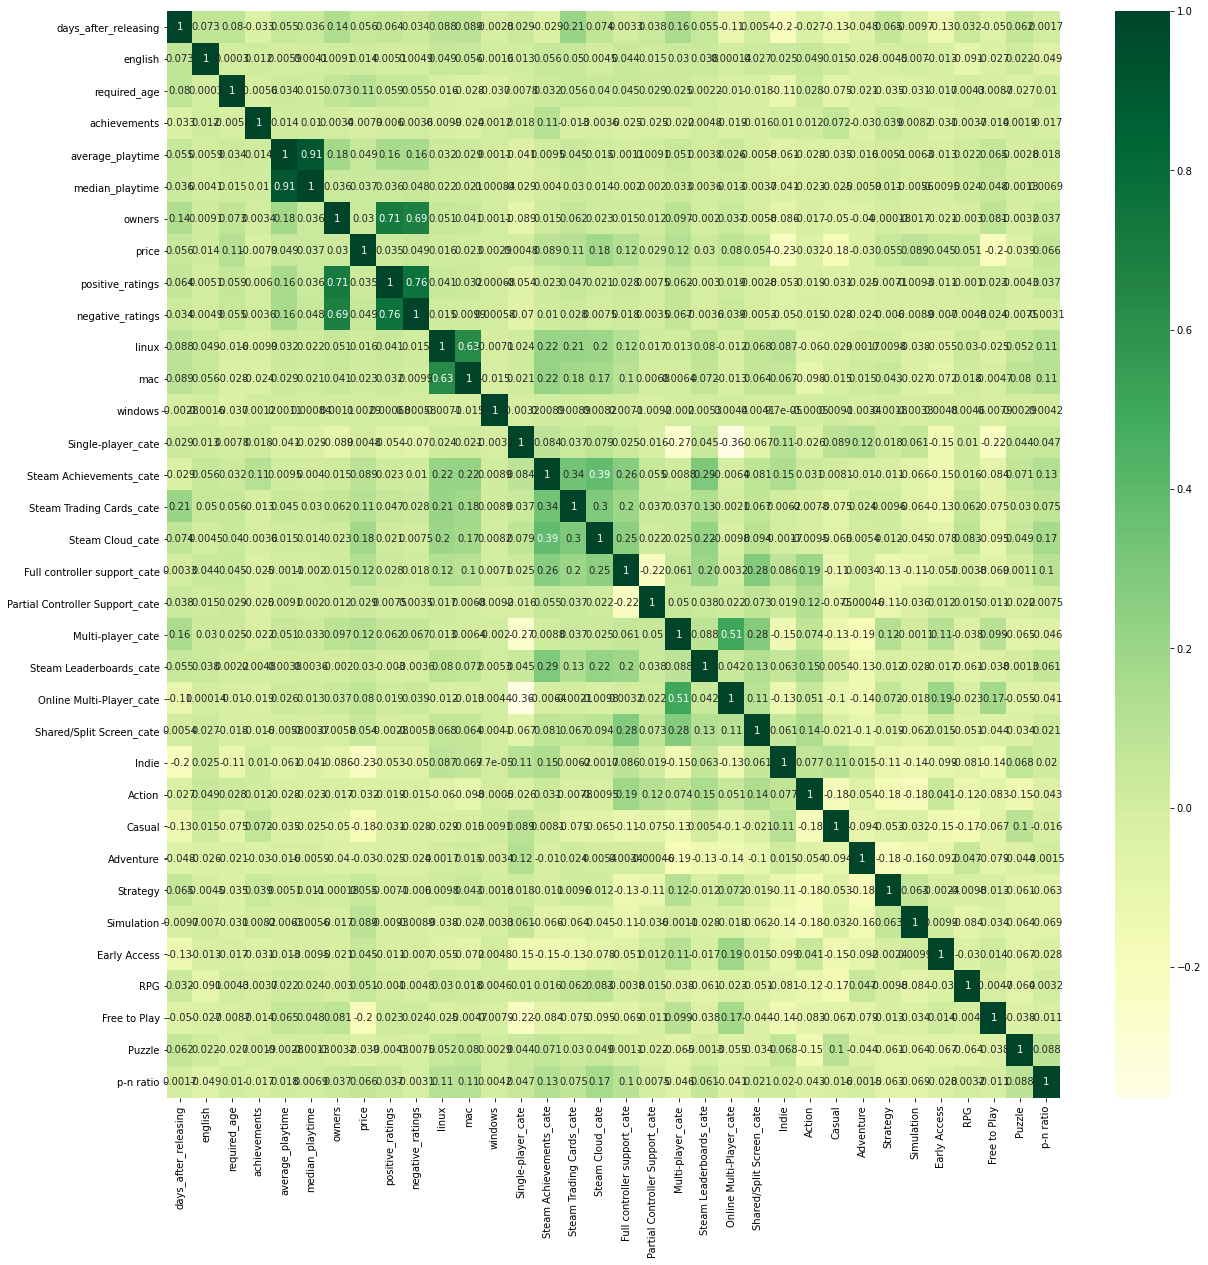

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr_df=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap='YlGn')
plt.show()